# Final Project 5/12/2021

Assignment #1: 
A correlation analysis between two variables to test their association; include a scatterplot
First, import the data (using plot data)
Then, get only the CRUmnC and CRUmnPrec to be the data
Then, perform means and stdev on it
Last, plot it as a scatterplot

List of column names :  ['Plot_ID', 'DataSource_ID', 'PlotName', 'Location', 'DetailsPlots', 'ExperimentalTreatment', 'Latitude', 'Longitude', 'Elevation', 'SourceGeogrData', 'StartYear', 'EndYear', 'Duration', 'WWFecoRegion', 'ClimaticZone', 'ProtectedArea', 'frcCrop_start', 'frcCrop_end', 'frcUrban_start', 'frcUrban_end', 'frcForest_start', 'frcForest_end', 'Urbanization', 'Cropification', 'frcCrop900m', 'frcUrban900m', 'CRUmnC', 'CRUmnK', 'CRUdeltaTmean', 'CRUrelDeltaTmean', 'CRUmnPrec', 'CRUdeltaPrec', 'CRUrelDeltaPrec', 'CHELSAmnC', 'CHELSAmnK', 'CHELSAdeltaTmean', 'CHELSArelDeltaTmean', 'CHELSAmnPrec', 'CHELSAdeltaPrec', 'CHELSArelDeltaPrec']
data1: mean=9.844 stdv=6.728
data2: mean=81.640 stdv=46.352


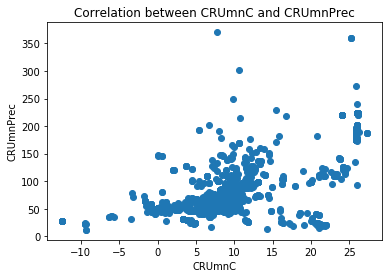

Pearsons correlation: 0.651
Spearmans correlation: 0.534
r= 0.6511495084433032
p-value= 8.159135403529404e-202


In [66]:
#open and print the data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from numpy import mean
from numpy import std
from matplotlib import pyplot
from scipy.stats import pearsonr
from scipy.stats import spearmanr

#import os
#os.getcwd()
insectdata = pd.read_csv('Final/InsectChange/PlotData.csv', encoding='latin-1')
#print(insectdata)
list_of_column_names = list(insectdata.columns)
print('List of column names : ', 
      list_of_column_names)
#insects = insectdata.head()
#insects

insectdata[['CRUmnC', 'CRUmnPrec']]
data1= insectdata['CRUmnC']
data2= insectdata['CRUmnPrec']
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
pyplot.scatter(data1, data2)
plt.ylabel('CRUmnPrec')
plt.xlabel('CRUmnC')
plt.title('Correlation between CRUmnC and CRUmnPrec')
pyplot.show()


#correlations
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)


r,p = stats.pearsonr(data1,data2)
print('r=', r)
print('p-value=', p)

Assignment #2: A regression analysis in which you ask if one variable can predict another; include a scatterplot with line of best fit Using the data make a scatterplot with the regression included on it. Do this by doing the regression math first. then plot with the line of best fit from the regression math. 

R^2: 0.423996
r= 0.6511495084433032
slope=  4.485752268293114
intercept=  37.48358635907717


Text(0.5, 1.0, 'Correlation between CRUmmPrec and CRUmmC')

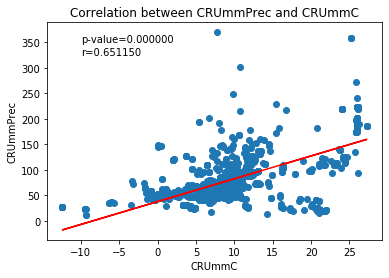

In [102]:
reg= stats.linregress(data1,data2)
#print(reg)
print(f"R^2: {reg.rvalue**2:.6f}")
print('r=', r)
print('slope= ', slope)
print('intercept= ', intercept)


plt.plot(data1,data2, 'o')
plt.text(-10, 350, 'p-value=%f' %p)
plt.text(-10, 325, 'r=%f' %r)
line = slope*data1+intercept
plt.plot(data1, line, 'r', label= 'y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.ylabel('CRUmmPrec')
plt.xlabel('CRUmmC')
plt.title('Correlation between CRUmmPrec and CRUmmC')


Assignment #3: A means comparison between two categories within a single variable; include a bar plot with error bars
Find the mean of the two data sets and then do a two sided statistic and plot the mean with the error bars

CRUmmC mean = 9.844
CRUmmC sd = 6.73
CRUmmPrec mean = 81.64
CRUmmPrec sd = 46.366

t-statistic = -62.585
p-value = 0.0
(9.52055286179015, 10.16701197763425)
(79.41363553991563, 83.86707581385376)


Text(0.5, 1.0, 'Means Comparison between CRUmmC and CRUmmPrec')

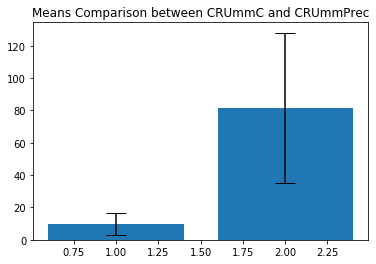

In [115]:
data1_mean = np.mean(data1)
data1_sd = np.std(data1, ddof = 1)

data2_mean = np.mean(data2)
data2_sd = np.std(data2, ddof = 1)

print('CRUmmC mean = ' + str(round(data1_mean,3)))
print('CRUmmC sd = ' + str(round(data1_sd,3)))
print('CRUmmPrec mean = ' + str(round(data2_mean,3)))
print('CRUmmPrec sd = ' + str(round(data2_sd,3)))
print()


twosided = stats.ttest_ind(data1,data2)
print('t-statistic = ' + str(round(twosided.statistic,3)))
print('p-value = ' + str(round(twosided.pvalue,5)))

plt.bar([1,2],[data1_mean,data2_mean], yerr=[data1_sd, data2_sd], capsize =10)

data1_95CI = stats.t.interval(alpha=0.95, df=len(data1)-1, loc=data1_mean, scale=stats.sem(data1)) 
data2_95CI = stats.t.interval(alpha=0.95, df=len(data2)-1, loc=data2_mean, scale=stats.sem(data2))
print(data1_95CI)
print(data2_95CI)


plt.xaxis = ["CRUmmC", "CRUmmPrec"]
plt.title('Means Comparison between CRUmmC and CRUmmPrec')

Assignment #4: A chi-square analysis comparing two categorical variables; include a contingency table and the resulting table of expected values in a decent looking format. 
Using the mean as the expected value and the different data points a two sided chi can be made and the results can be shown through the simple chi squared function

In [152]:
import numpy as np

data = np.array([[data1_mean, 16.2488508762537],[data2_mean, 103.470691280029]])

X = stats.chi2_contingency(data)

print(X)

import pandas as pd

data_df = pd.DataFrame(data, index = ["CRUmmC","CRUmmPrec"], columns = ["A","B"])

chi2, p, dof, expected = stats.chi2_contingency(data_df)    

print('Data')
print()
print(data_df)
print()
print('Chi-square results')
print()
print('   chi-square = '+ str(round(chi2,4)))
print('   p value = '+ str(round(p,4)))
print('   degrees of freedom = '+ str(dof))
print('   expected values:')
print()
print(pd.DataFrame(expected, index = ["CRUmmC","CRUmmPrec"], columns = ["Observed","Expected"]))

(0.16358181023684618, 0.6858800138113634, 1, array([[ 11.30218027,  14.79045303],
       [ 80.18195783, 104.92908913]]))
Data

                   A           B
CRUmmC      9.843782   16.248851
CRUmmPrec  81.640356  103.470691

Chi-square results

   chi-square = 0.1636
   p value = 0.6859
   degrees of freedom = 1
   expected values:

            Observed    Expected
CRUmmC     11.302180   14.790453
CRUmmPrec  80.181958  104.929089
